## Introduction

Tree-based models use a series of **if-then rules** to generate predictions from one or more decision trees. All tree-based 

models can be used for either **regression** (predicting numerical values) or **classification** (predicting categorical values). We’ll

explore three types of tree-based models:

1) **Decision tree models**, which are the foundation of all tree-based models.

2) **Random forest models**, an “ensemble” method which builds many decision trees in parallel.

3) **Gradient boosting models**, an “ensemble” method which builds many decision trees sequentially.


## Fraud detection

In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve, precision_recall_curve, average_precision_score
from yellowbrick.classifier import PrecisionRecallCurve
from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import ConfusionMatrix
%matplotlib inline

In [44]:
# download the dataset from https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

In [2]:
credit_card = pd.read_csv('creditcard.csv')

## data Profiling

In [4]:
profile = ProfileReport(credit_card, title='Pandas Profiling Report',  minimal=True)
profile.to_file("Credit_card.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [5]:
profile

In [6]:
credit_card.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [9]:
credit_card.shape

(284807, 31)

* Given the class imbalance ratio, we recommend measuring the accuracy using **the Area Under the Precision-Recall Curve (AUPRC)**

In [10]:
# split data to train and test
X = credit_card.drop('Class', axis=1)
y = credit_card.Class
X_train, X_test , y_train , y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

## apply decision tree

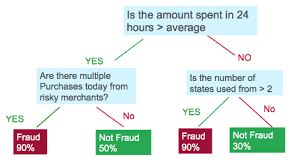

* Commonly used for fraud detection
* Transparent results, easily interpreted by analysts
* Decision trees are prone to overfit the data

In [43]:
dt = DecisionTreeClassifier(random_state=0)
dt.fit(X_train, y_train)
predicted = dt.predict(X_test)
print(f'Accuracy Score:\n{accuracy_score(y_test, predicted)}')

Accuracy Score:
0.9991573329588147


In [36]:
from sklearn.model_selection import GridSearchCV
tree_para = {'max_depth':[8,9,10]}
clf = GridSearchCV(DecisionTreeClassifier(), tree_para)

In [37]:
clf.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [8, 9, 10]})

In [38]:
clf.best_score_

0.9994382145756984

In [39]:
clf.best_params_

{'max_depth': 8}

### confusion matrix

* Data scientists use confusion matrices to understand which classes are most easily confused. 
* These provide similar information as what is available in a **ClassificationReport**, but rather than top-level scores, they provide deeper insight into the classification of individual data points.

/home/oussama/anaconda3/lib/python3.9/site-packages/yellowbrick/classifier/base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(


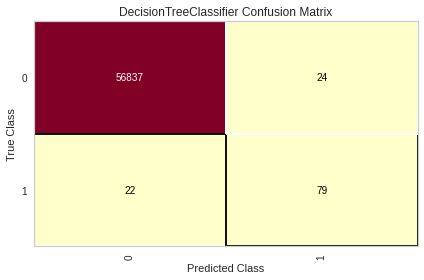

In [23]:
cm = ConfusionMatrix(dt, classes=dt.classes_)


# To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
# and then creates the confusion_matrix from scikit-learn.
cm.score(X_test, y_test)

# How did we do?
cm.show();

In [25]:
# todo : interpret results

### Classification report

* The classification report visualizer displays the **precision**, **recall**, **F1**, and **support** scores for the model

/home/oussama/anaconda3/lib/python3.9/site-packages/yellowbrick/classifier/base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(


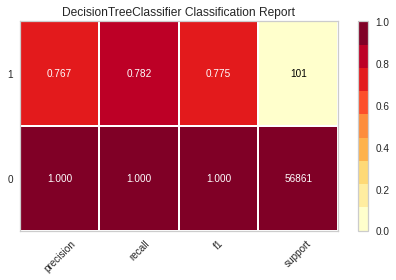

In [29]:
visualizer = ClassificationReport(dt, classes=dt.classes_, support=True)

visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()   ;

In [27]:
# todo : interpret results

* **Reminder**:
  * **Precsion** : the ratio of correct positive predictions to the total **predicted positives**
      * ==> Precision can be seen as a measure of a classifier’s exactness.
      * Said another way, “for all instances classified positive, what percent was correct?”
  * **Recall** (also called sensitivity): the ratio of correct positive predictions to the total **positives examples**
      * ==> Recall is a measure of the classifier’s completeness; the ability of a classifier to correctly find all positive instances.
      * Said another way, “for all instances that were actually positive, what percent was classified correctly?”

### Precision recall Curve

* **The precision-recall curve** shows the tradeoff between **precision** and **recall** for different threshold.
* A high area under the curve represents both **high recall** and **high precision**, where **high precision** relates to a **low false positive rate**, and **high recall** relates to a **low false negative rate**. High scores for both show that the classifier is returning accurate results (high precision), as well as returning a majority of all positive results (high recall).

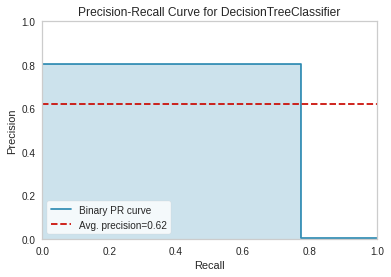

In [31]:
viz = PrecisionRecallCurve(DecisionTreeClassifier())
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();

## apply random forest

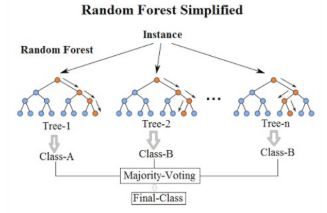

* Random Forests are a more robust option than a single decision tree
* Construct a multitude of decision trees when training the model and outputting the class that is the mode or mean predicted class of the individual trees
* A random forest consists of a collection of trees on a random subset of features
* Final predictions are the combined results of those trees
* Random forests can handle complex data and are not prone to overfit
* They are interpretable by looking at feature importance, and can be adjusted to work well on highly imbalanced data
* Their drawback is they're computationally complex
* Very popular for fraud detection
* A Random Forest model will be optimized in the exercises

In [13]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
predicted = model.predict(X_test)
print(f'Accuracy Score:\n{accuracy_score(y_test, predicted)}')

Accuracy Score:
0.9994733330992591
